In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import association_metrics as am


In [18]:
offers = pd.read_csv('../datasets\offers_transform.csv')
offers = offers.dropna(subset=['Id'])
lead = pd.read_csv('../datasets\leads_transform.csv')
lead = lead.dropna(subset=['Id'])
lead = lead.add_prefix('lead_')

In [19]:
df = pd.merge(offers, lead, left_on='Id', right_on='lead_Id', how='inner')

<AxesSubplot: >

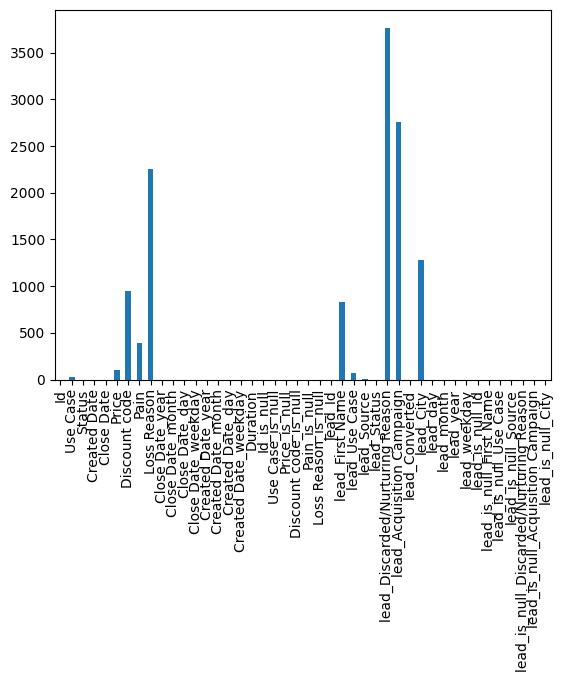

In [22]:
df.isnull().sum().plot(kind='bar')

In [32]:
lead_colums_isnull = [column for column in df.columns if "is_null" in column]
lead_colums_isnull

['Id_is_null',
 'Use Case_is_null',
 'Price_is_null',
 'Discount code_is_null',
 'Pain_is_null',
 'Loss Reason_is_null',
 'lead_is_null_Id',
 'lead_is_null_First Name',
 'lead_is_null_Use Case',
 'lead_is_null_Source',
 'lead_is_null_Discarded/Nurturing Reason',
 'lead_is_null_Acquisition Campaign',
 'lead_is_null_City']

In [35]:
for column in lead_colums_isnull:
    df[column] = df[column].astype('category')

C:\Users\EQUIPO\AppData\Local\Temp\ipykernel_15316\1186580174.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<AxesSubplot: >

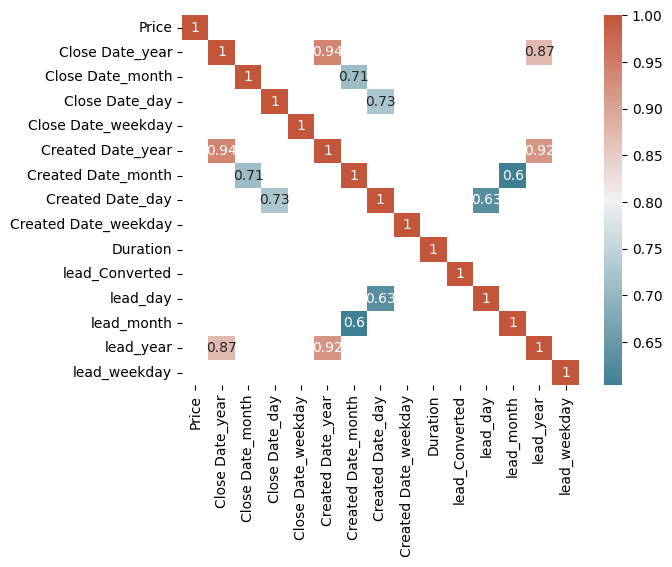

In [39]:
corr = df.corr()
corr = corr[corr > 0.5]
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

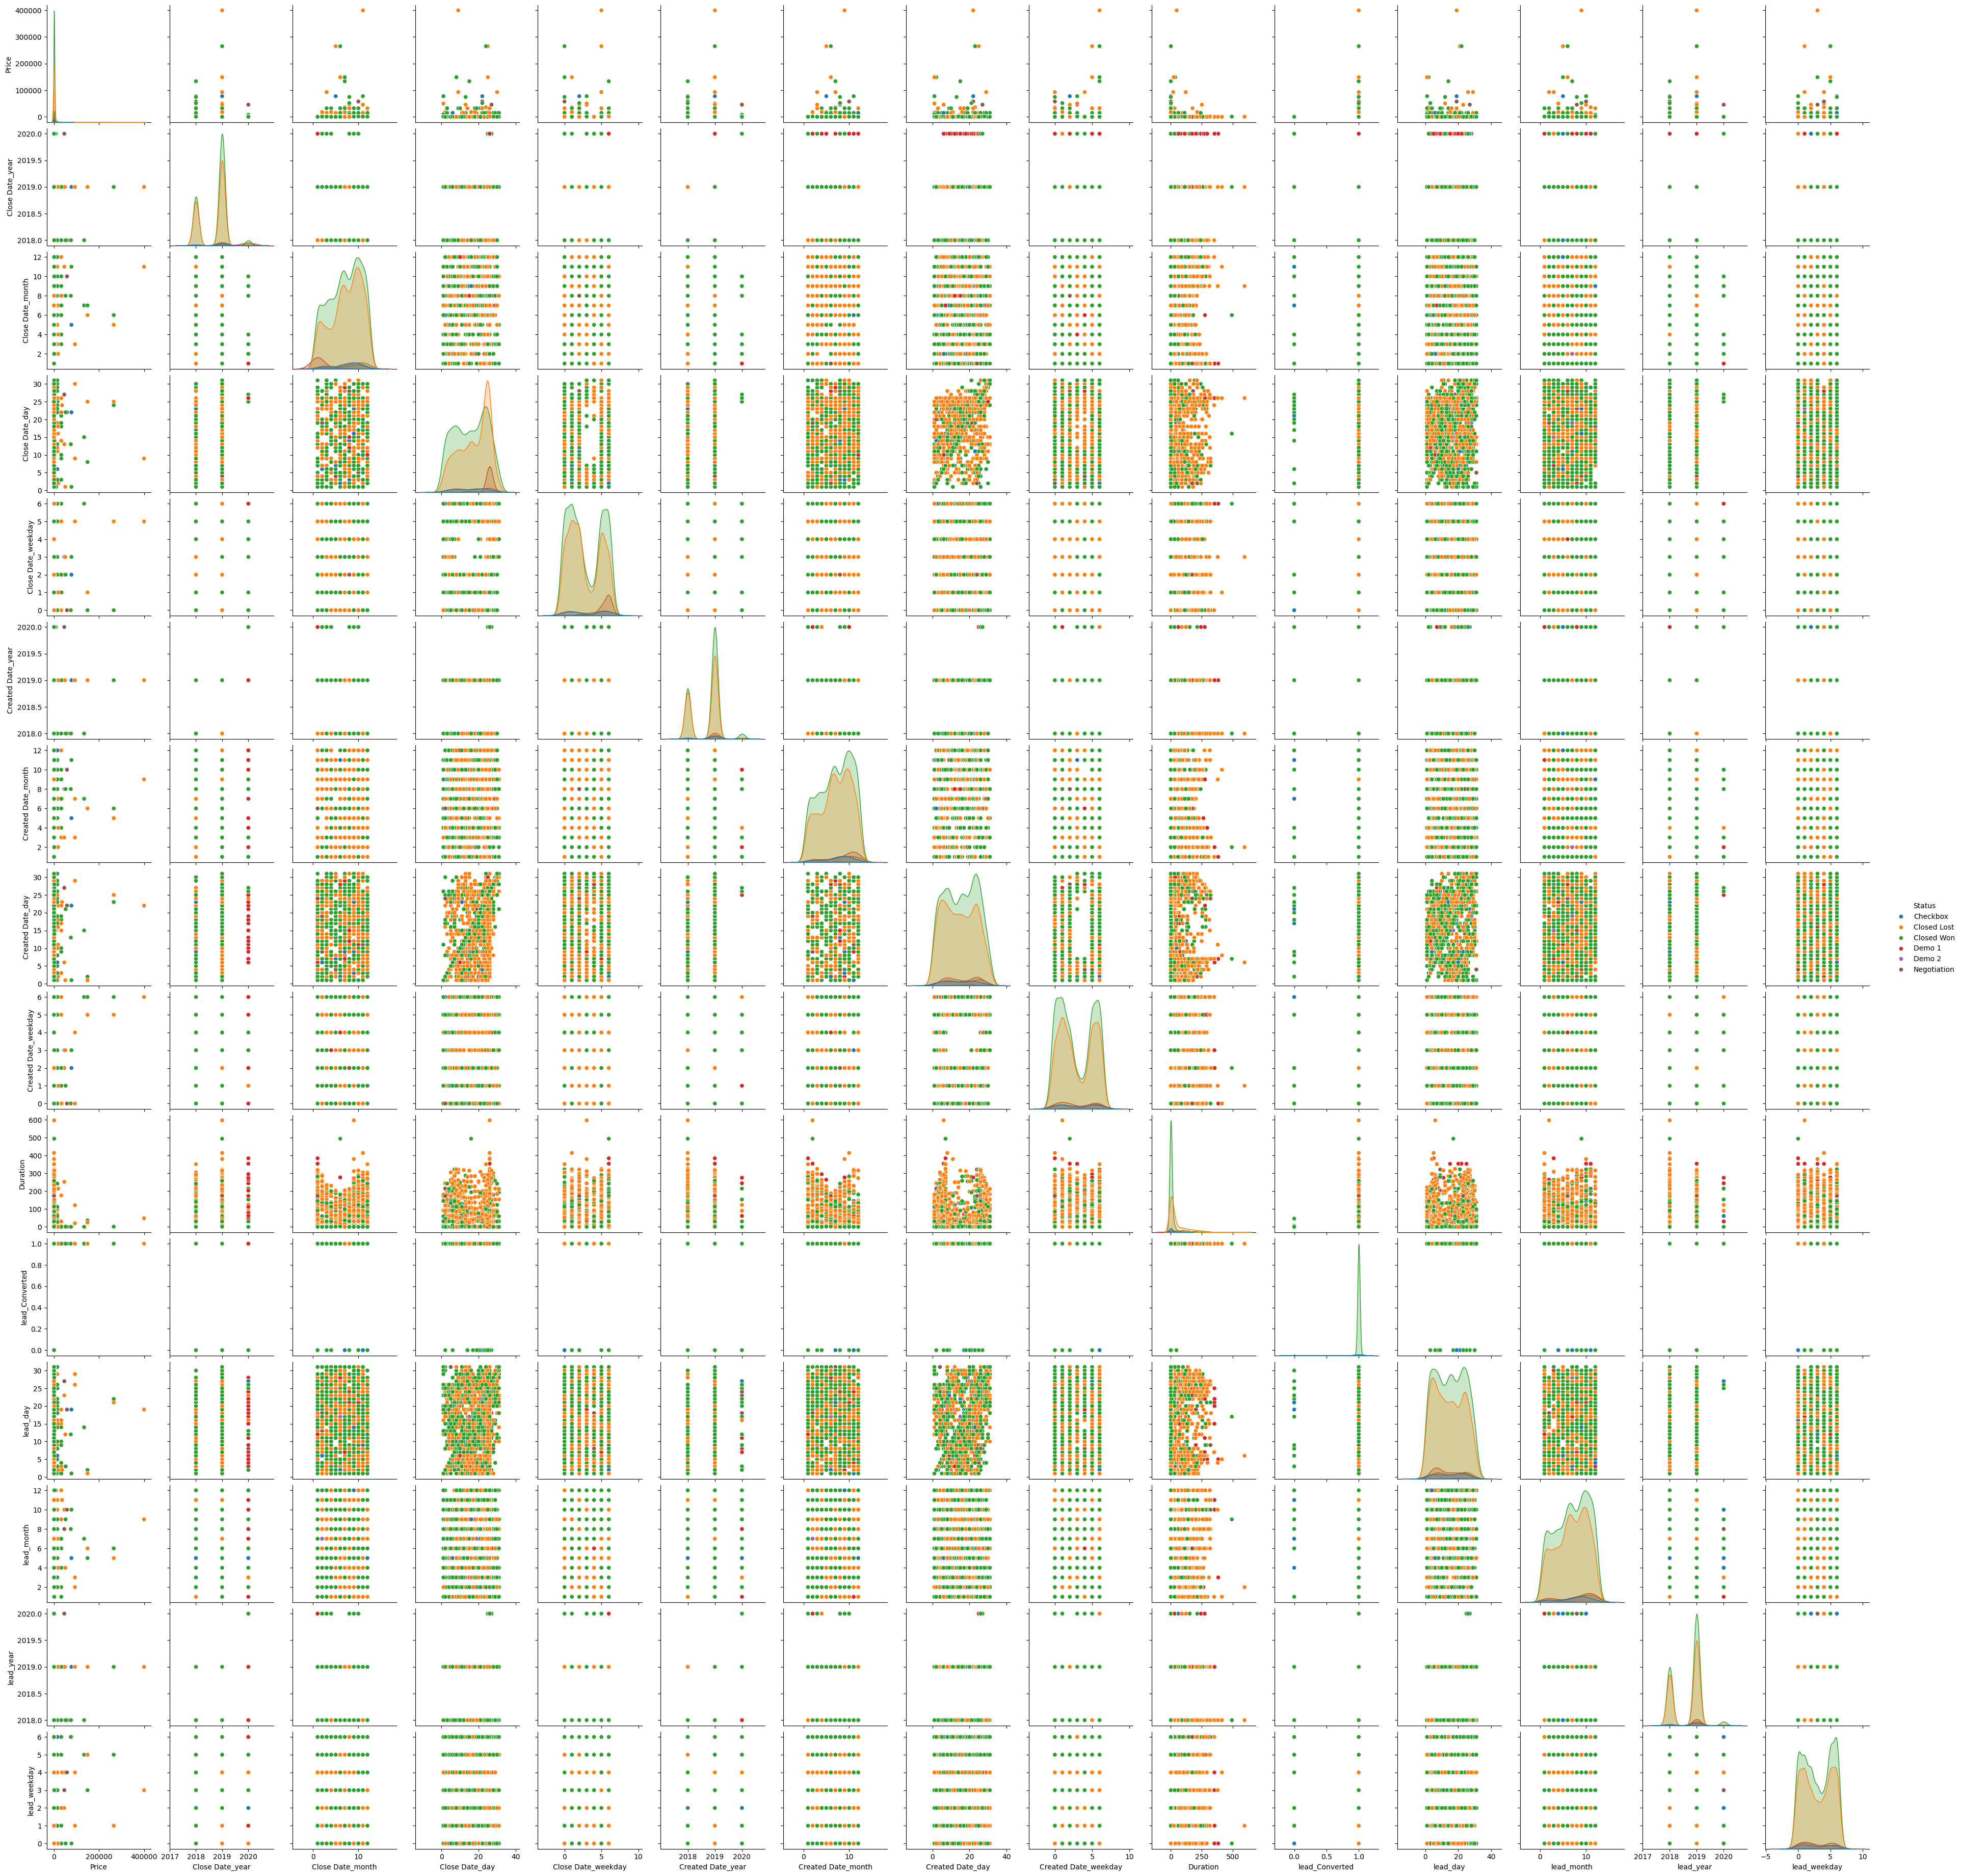

In [69]:
sns.pairplot(df, hue='Status')

In [57]:
categorical = [column for column in df.columns if df[column].dtype == 'object']
categorical += lead_colums_isnull
categorical

['Id',
 'Use Case',
 'Status',
 'Created Date',
 'Close Date',
 'Discount code',
 'Pain',
 'Loss Reason',
 'lead_Id',
 'lead_First Name',
 'lead_Use Case',
 'lead_Source',
 'lead_Status',
 'lead_Discarded/Nurturing Reason',
 'lead_Acquisition Campaign',
 'lead_City',
 'Id_is_null',
 'Use Case_is_null',
 'Price_is_null',
 'Discount code_is_null',
 'Pain_is_null',
 'Loss Reason_is_null',
 'lead_is_null_Id',
 'lead_is_null_First Name',
 'lead_is_null_Use Case',
 'lead_is_null_Source',
 'lead_is_null_Discarded/Nurturing Reason',
 'lead_is_null_Acquisition Campaign',
 'lead_is_null_City']

In [59]:
for column in categorical:
    df[column] = df[column].astype('category')

c:\Users\EQUIPO\Desktop\personal\shimoku\env\lib\site-packages\association_metrics\categorical.py:78: RuntimeWarning: invalid value encountered in scalar divide
  v = sqrt((chi2/n)/mindim)
c:\Users\EQUIPO\Desktop\personal\shimoku\env\lib\site-packages\association_metrics\categorical.py:78: RuntimeWarning: invalid value encountered in scalar divide
  v = sqrt((chi2/n)/mindim)
c:\Users\EQUIPO\Desktop\personal\shimoku\env\lib\site-packages\association_metrics\categorical.py:78: RuntimeWarning: invalid value encountered in scalar divide
  v = sqrt((chi2/n)/mindim)
c:\Users\EQUIPO\Desktop\personal\shimoku\env\lib\site-packages\association_metrics\categorical.py:78: RuntimeWarning: invalid value encountered in scalar divide
  v = sqrt((chi2/n)/mindim)
c:\Users\EQUIPO\Desktop\personal\shimoku\env\lib\site-packages\association_metrics\categorical.py:78: RuntimeWarning: invalid value encountered in scalar divide
  v = sqrt((chi2/n)/mindim)
c:\Users\EQUIPO\Desktop\personal\shimoku\env\lib\site-p

<AxesSubplot: >

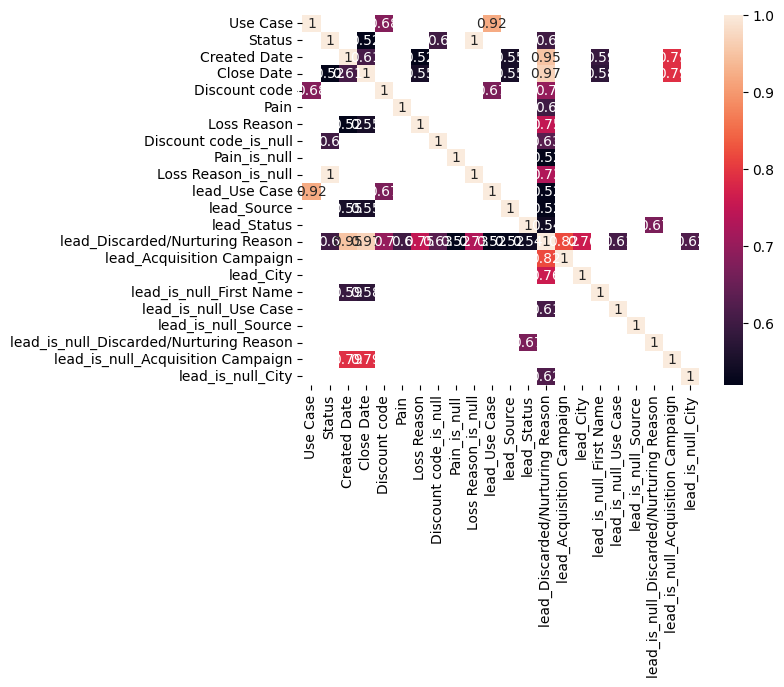

In [68]:
df_test = df.drop(["Id",'Id_is_null',"Use Case_is_null","Price_is_null", "lead_is_null_Id", "lead_Id", "lead_First Name"], axis=1)
cramer = am.CramersV(df_test).fit().round(2)
corr = cramer[cramer >= 0.5]
sns.heatmap(corr, xticklabels=cramer.columns, yticklabels=cramer.columns, annot=True)